In [1]:
import sys
sys.path.append('..')
from MPRA_predict.utils import *

In [24]:
df = pd.read_csv('../data/Zhang_MPRA/merged_expression_summary.tsv', sep='\t')
df

,sequence,7_exp_2_K562_mean,7_exp_293T_mean,7_exp_HepG2_mean,7_exp_Jurkat_mean,name
0,AAAAAAAACAAAACAGGTAAGGATGAAAAGTTCCAGGTGAGAACAA...,0.282,0.457,0.566,0.292,chr12:45192846-45193014
1,AAAAAAAGCATGGAGTTAGGAAAAATTTTCCTATGGGAGTGAGGTA...,0.277,0.530,5.724,0.280,chrX:102658676-102658844
2,AAAAACACTTGAAAATTTTTGGCAGTCAGCAGGAATAGATAGGGAG...,0.258,0.458,1.068,0.279,chr7:79506606-79506774
3,AAAAACATAGTAAATGTTTAACTTTAAAGTGGCATAACATTGTGAC...,0.541,0.408,1.999,0.214,chr1:40715816-40715984
4,AAAAATGTTTCAAAAGAACAAACCTCCTAAAGAGCTTTGTACTTTT...,2.410,2.757,8.138,0.894,chr4:109802056-109802224
...,...,...,...,...,...,...
17682,CAAATGCCCTTTGAACTTGTGTAGTTAAATATTTGTTAACTGGCTA...,NaN,NaN,1.180,NaN,NaN
17683,TTTTTGCCAGCTGGTGTAGATGTTAAAAATTACTGTCACTCTTCCG...,NaN,NaN,1.244,NaN,NaN
17684,TTTTTGCCAGCTGGTGTAGATGTTAAAAATTACTGTCACTCTTCCG...,NaN,NaN,0.202,NaN,NaN
17685,TTTTTGCCAGCTGGTGTAGATGTTCTCTCTCTCTTCTCTCCCTCTC...,NaN,NaN,0.525,NaN,NaN


In [16]:
col_names = ['7_exp_2_K562_mean','7_exp_293T_mean','7_exp_HepG2_mean','7_exp_Jurkat_mean']
cell_types = ['K562', 'HEK293T', 'HepG2', 'Jurkat']
df = df.rename(columns=dict(zip(col_names, cell_types)))
corr_df = df[cell_types].corr(method="pearson")
corr_df

,K562,HEK293T,HepG2,Jurkat
K562,1.000,0.176,0.357,0.673
HEK293T,0.176,1.000,0.929,0.105
HepG2,0.357,0.929,1.000,0.261
Jurkat,0.673,0.105,0.261,1.000


In [17]:
df = df[df[cell_types].notna().all(axis=1)].reset_index(drop=True)
df = df.sort_values(by=['sequence']).reset_index(drop=True)
df

,sequence,K562,HEK293T,HepG2,Jurkat,name
0,AAAAAAAAAAACCTCTGCCTTCATTGCAAATTCTTGGTGGTATGAA...,0.240,0.554,2.794,0.181,chr10:61837316-61837484
1,AAAAAAAACAAAACAGGTAAGGATGAAAAGTTCCAGGTGAGAACAA...,0.282,0.457,0.566,0.292,chr12:45192846-45193014
2,AAAAAAAGCACAAAAATGCAAAAAACGTAGCACAGCAAAAAGGACA...,3.093,1.431,3.926,2.492,chr13:50241636-50241804
3,AAAAAAAGCATGGAGTTAGGAAAAATTTTCCTATGGGAGTGAGGTA...,0.277,0.530,5.724,0.280,chrX:102658676-102658844
4,AAAAACACTTGAAAATTTTTGGCAGTCAGCAGGAATAGATAGGGAG...,0.258,0.458,1.068,0.279,chr7:79506606-79506774
...,...,...,...,...,...,...
17395,TTTTTTCCCCTTTCCCTCCTCAGGTCTTCCTGTCAGCTGTTACTAT...,0.304,0.506,7.519,0.333,chr18:39701966-39702134
17396,TTTTTTCTAATTGTTTTAGAGGTTGAAAGATACTGTGACTCTTCCG...,0.191,0.421,0.324,0.234,orig_backbone_change20%_18
17397,TTTTTTGTTGCTGTTCTGTTTTACCTTTCACCATGGAAAATTTGGT...,0.214,0.451,1.616,0.138,chr2:64128946-64129114
17398,TTTTTTTCAGCTCACTTTTCCCTTGACTTCTAAAGCACATATTTAC...,0.580,0.460,2.004,0.228,chr5:99721596-99721764


In [18]:
df.to_csv('../data/Zhang_MPRA/Zhang_MPRA_Zhang_processed.csv', index=False)

In [100]:
cell_names = ['7_exp_2_K562','7_exp_HepG2','7_exp_293T','7_exp_Jurkat', '7_exp_Raji']
cell_types = ['K562', 'HepG2', 'HEK293T', 'Jurkat', 'Raji']

# cell_names = ['7_exp_2_K562','7_exp_HepG2','7_exp_293T','7_exp_Jurkat']
# cell_types = ['K562', 'HepG2', 'HEK293T', 'Jurkat']

In [101]:
for i in range(len(cell_names)):
    cell_name = cell_names[i]
    cell_type = cell_types[i]
    df1 = pd.read_csv(f'../data/Zhang_MPRA/raw/{cell_name}_rep1.tsv', sep='\t', header=None, names=['seq', f'{cell_type}_1', 'id'])
    df2 = pd.read_csv(f'../data/Zhang_MPRA/raw/{cell_name}_rep2.tsv', sep='\t', header=None, names=['seq', f'{cell_type}_2', 'id'])
    df3 = pd.read_csv(f'../data/Zhang_MPRA/raw/{cell_name}_rep3.tsv', sep='\t', header=None, names=['seq', f'{cell_type}_3', 'id'])
    df_merged = pd.DataFrame(columns=["seq", "id"])
    df_merged = pd.merge(df_merged, df1, on=['seq', 'id'], how="outer")
    df_merged = pd.merge(df_merged, df2, on=['seq', 'id'], how="outer")
    df_merged = pd.merge(df_merged, df3, on=['seq', 'id'], how="outer")
    df_merged[cell_type] = np.nanmean(np.log2(df_merged[[f'{cell_type}_1', f'{cell_type}_2', f'{cell_type}_3']]), axis=1)
    df_merged = df_merged.drop([f'{cell_type}_1', f'{cell_type}_2', f'{cell_type}_3'], axis=1)
    df_merged.to_csv(f'../data/Zhang_MPRA/{cell_type}_mean.tsv', sep='\t', index=False)

In [104]:
cell_names = ['7_exp_2_K562','7_exp_HepG2','7_exp_293T','7_exp_Jurkat']
cell_types = ['K562', 'HepG2', 'HEK293T', 'Jurkat']

In [105]:
df = pd.DataFrame(columns=["seq", "id"])
for i in range(len(cell_names)):
    cell_name = cell_names[i]
    cell_type = cell_types[i]
    df1 = pd.read_csv(f'../data/Zhang_MPRA/{cell_type}_mean.tsv', sep='\t')
    df = pd.merge(df, df1, on=['seq', 'id'], how="outer")
df

,seq,id,K562,HepG2,HEK293T,Jurkat
0,AAAAAAAAAAACCTCTGCCTTCATTGCAAATTCTTGGTGGTATGAA...,chr10:61837316-61837484,-2.061,1.465,-0.857,-2.474
1,AAAAAAAACAAAACAGGTAAGGATGAAAAGTTCCAGGTGAGAACAA...,chr12:45192846-45193014,-1.826,-0.830,-1.138,-1.781
2,AAAAAAAGCACAAAAATGCAAAAAACGTAGCACAGCAAAAAGGACA...,chr13:50241636-50241804,1.626,1.967,0.508,1.314
3,AAAAAAAGCATGGAGTTAGGAAAAATTTTCCTATGGGAGTGAGGTA...,chrX:102658676-102658844,-1.850,2.512,-0.919,-1.835
4,AAAAACACTTGAAAATTTTTGGCAGTCAGCAGGAATAGATAGGGAG...,chr7:79506606-79506774,-1.958,0.090,-1.128,-1.847
...,...,...,...,...,...,...
17682,TTTTTTCTAATTGTTTTAGAGGTTGAAAGATACTGTGACTCTTCCG...,orig_backbone_change20%_18,-2.389,-1.626,-1.254,-2.107
17683,TTTTTTCTTTAAGGTCACAATGCAAAGTAAAGCACTTACTATGACC...,chr13:97491586-97491754,NaN,-0.878,-1.590,NaN
17684,TTTTTTGTTGCTGTTCTGTTTTACCTTTCACCATGGAAAATTTGGT...,chr2:64128946-64129114,-2.233,0.682,-1.148,-2.925
17685,TTTTTTTCAGCTCACTTTTCCCTTGACTTCTAAAGCACATATTTAC...,chr5:99721596-99721764,-0.790,0.991,-1.126,-2.246


In [106]:
df[cell_types].corr(method="pearson")

,K562,HepG2,HEK293T,Jurkat
K562,1.000,0.732,0.782,0.787
HepG2,0.732,1.000,0.743,0.563
HEK293T,0.782,0.743,1.000,0.703
Jurkat,0.787,0.563,0.703,1.000


In [107]:
df = df[df[cell_types].notna().all(axis=1)].reindex()
df

,seq,id,K562,HepG2,HEK293T,Jurkat
0,AAAAAAAAAAACCTCTGCCTTCATTGCAAATTCTTGGTGGTATGAA...,chr10:61837316-61837484,-2.061,1.465,-0.857,-2.474
1,AAAAAAAACAAAACAGGTAAGGATGAAAAGTTCCAGGTGAGAACAA...,chr12:45192846-45193014,-1.826,-0.830,-1.138,-1.781
2,AAAAAAAGCACAAAAATGCAAAAAACGTAGCACAGCAAAAAGGACA...,chr13:50241636-50241804,1.626,1.967,0.508,1.314
3,AAAAAAAGCATGGAGTTAGGAAAAATTTTCCTATGGGAGTGAGGTA...,chrX:102658676-102658844,-1.850,2.512,-0.919,-1.835
4,AAAAACACTTGAAAATTTTTGGCAGTCAGCAGGAATAGATAGGGAG...,chr7:79506606-79506774,-1.958,0.090,-1.128,-1.847
...,...,...,...,...,...,...
17681,TTTTTTCCCCTTTCCCTCCTCAGGTCTTCCTGTCAGCTGTTACTAT...,chr18:39701966-39702134,-1.720,2.907,-0.983,-1.588
17682,TTTTTTCTAATTGTTTTAGAGGTTGAAAGATACTGTGACTCTTCCG...,orig_backbone_change20%_18,-2.389,-1.626,-1.254,-2.107
17684,TTTTTTGTTGCTGTTCTGTTTTACCTTTCACCATGGAAAATTTGGT...,chr2:64128946-64129114,-2.233,0.682,-1.148,-2.925
17685,TTTTTTTCAGCTCACTTTTCCCTTGACTTCTAAAGCACATATTTAC...,chr5:99721596-99721764,-0.790,0.991,-1.126,-2.246


In [108]:
df.to_csv("../data/Zhang_MPRA/Zhang_MPRA_final.tsv", sep='\t', index=False)

In [109]:
df = pd.read_csv("../data/Zhang_MPRA/Zhang_MPRA_final.tsv", sep="\t")
df

,seq,id,K562,HepG2,HEK293T,Jurkat
0,AAAAAAAAAAACCTCTGCCTTCATTGCAAATTCTTGGTGGTATGAA...,chr10:61837316-61837484,-2.061,1.465,-0.857,-2.474
1,AAAAAAAACAAAACAGGTAAGGATGAAAAGTTCCAGGTGAGAACAA...,chr12:45192846-45193014,-1.826,-0.830,-1.138,-1.781
2,AAAAAAAGCACAAAAATGCAAAAAACGTAGCACAGCAAAAAGGACA...,chr13:50241636-50241804,1.626,1.967,0.508,1.314
3,AAAAAAAGCATGGAGTTAGGAAAAATTTTCCTATGGGAGTGAGGTA...,chrX:102658676-102658844,-1.850,2.512,-0.919,-1.835
4,AAAAACACTTGAAAATTTTTGGCAGTCAGCAGGAATAGATAGGGAG...,chr7:79506606-79506774,-1.958,0.090,-1.128,-1.847
...,...,...,...,...,...,...
17395,TTTTTTCCCCTTTCCCTCCTCAGGTCTTCCTGTCAGCTGTTACTAT...,chr18:39701966-39702134,-1.720,2.907,-0.983,-1.588
17396,TTTTTTCTAATTGTTTTAGAGGTTGAAAGATACTGTGACTCTTCCG...,orig_backbone_change20%_18,-2.389,-1.626,-1.254,-2.107
17397,TTTTTTGTTGCTGTTCTGTTTTACCTTTCACCATGGAAAATTTGGT...,chr2:64128946-64129114,-2.233,0.682,-1.148,-2.925
17398,TTTTTTTCAGCTCACTTTTCCCTTGACTTCTAAAGCACATATTTAC...,chr5:99721596-99721764,-0.790,0.991,-1.126,-2.246


In [110]:
Raji_df = pd.read_csv(f'../data/Zhang_MPRA/Raji_mean.tsv', sep='\t')
Raji_df

,seq,id,Raji
0,AAAAAAAAAAACCTCTGCCTTCATTGCAAATTCTTGGTGGTATGAA...,chr10:61837316-61837484,-1.785
1,AAAAAAAACAAAACAGGTAAGGATGAAAAGTTCCAGGTGAGAACAA...,chr12:45192846-45193014,-1.548
2,AAAAAAAGCACAAAAATGCAAAAAACGTAGCACAGCAAAAAGGACA...,chr13:50241636-50241804,0.862
3,AAAAAAAGCATGGAGTTAGGAAAAATTTTCCTATGGGAGTGAGGTA...,chrX:102658676-102658844,-0.914
4,AAAAACACTTGAAAATTTTTGGCAGTCAGCAGGAATAGATAGGGAG...,chr7:79506606-79506774,-1.949
...,...,...,...
17112,TTTTTTCCCCTTTCCCTCCTCAGGTCTTCCTGTCAGCTGTTACTAT...,chr18:39701966-39702134,-0.479
17113,TTTTTTCTAATTGTTTTAGAGGTTGAAAGATACTGTGACTCTTCCG...,orig_backbone_change20%_18,-2.439
17114,TTTTTTGTTGCTGTTCTGTTTTACCTTTCACCATGGAAAATTTGGT...,chr2:64128946-64129114,-2.237
17115,TTTTTTTCAGCTCACTTTTCCCTTGACTTCTAAAGCACATATTTAC...,chr5:99721596-99721764,-2.426


In [111]:
df_merged = pd.merge(df, Raji_df, on=['seq', 'id'], how="left")
df_merged

,seq,id,K562,HepG2,HEK293T,Jurkat,Raji
0,AAAAAAAAAAACCTCTGCCTTCATTGCAAATTCTTGGTGGTATGAA...,chr10:61837316-61837484,-2.061,1.465,-0.857,-2.474,-1.785
1,AAAAAAAACAAAACAGGTAAGGATGAAAAGTTCCAGGTGAGAACAA...,chr12:45192846-45193014,-1.826,-0.830,-1.138,-1.781,-1.548
2,AAAAAAAGCACAAAAATGCAAAAAACGTAGCACAGCAAAAAGGACA...,chr13:50241636-50241804,1.626,1.967,0.508,1.314,0.862
3,AAAAAAAGCATGGAGTTAGGAAAAATTTTCCTATGGGAGTGAGGTA...,chrX:102658676-102658844,-1.850,2.512,-0.919,-1.835,-0.914
4,AAAAACACTTGAAAATTTTTGGCAGTCAGCAGGAATAGATAGGGAG...,chr7:79506606-79506774,-1.958,0.090,-1.128,-1.847,-1.949
...,...,...,...,...,...,...,...
17395,TTTTTTCCCCTTTCCCTCCTCAGGTCTTCCTGTCAGCTGTTACTAT...,chr18:39701966-39702134,-1.720,2.907,-0.983,-1.588,-0.479
17396,TTTTTTCTAATTGTTTTAGAGGTTGAAAGATACTGTGACTCTTCCG...,orig_backbone_change20%_18,-2.389,-1.626,-1.254,-2.107,-2.439
17397,TTTTTTGTTGCTGTTCTGTTTTACCTTTCACCATGGAAAATTTGGT...,chr2:64128946-64129114,-2.233,0.682,-1.148,-2.925,-2.237
17398,TTTTTTTCAGCTCACTTTTCCCTTGACTTCTAAAGCACATATTTAC...,chr5:99721596-99721764,-0.790,0.991,-1.126,-2.246,-2.426


In [112]:
df_merged.to_csv('../data/Zhang_MPRA_Raji_merged.tsv', sep='\t', index=False)

In [113]:
df = pd.read_csv("../data/Zhang_MPRA/Zhang_MPRA_final.tsv", sep='\t')
df

,seq,id,K562,HepG2,HEK293T,Jurkat
0,AAAAAAAAAAACCTCTGCCTTCATTGCAAATTCTTGGTGGTATGAA...,chr10:61837316-61837484,-2.061,1.465,-0.857,-2.474
1,AAAAAAAACAAAACAGGTAAGGATGAAAAGTTCCAGGTGAGAACAA...,chr12:45192846-45193014,-1.826,-0.830,-1.138,-1.781
2,AAAAAAAGCACAAAAATGCAAAAAACGTAGCACAGCAAAAAGGACA...,chr13:50241636-50241804,1.626,1.967,0.508,1.314
3,AAAAAAAGCATGGAGTTAGGAAAAATTTTCCTATGGGAGTGAGGTA...,chrX:102658676-102658844,-1.850,2.512,-0.919,-1.835
4,AAAAACACTTGAAAATTTTTGGCAGTCAGCAGGAATAGATAGGGAG...,chr7:79506606-79506774,-1.958,0.090,-1.128,-1.847
...,...,...,...,...,...,...
17395,TTTTTTCCCCTTTCCCTCCTCAGGTCTTCCTGTCAGCTGTTACTAT...,chr18:39701966-39702134,-1.720,2.907,-0.983,-1.588
17396,TTTTTTCTAATTGTTTTAGAGGTTGAAAGATACTGTGACTCTTCCG...,orig_backbone_change20%_18,-2.389,-1.626,-1.254,-2.107
17397,TTTTTTGTTGCTGTTCTGTTTTACCTTTCACCATGGAAAATTTGGT...,chr2:64128946-64129114,-2.233,0.682,-1.148,-2.925
17398,TTTTTTTCAGCTCACTTTTCCCTTGACTTCTAAAGCACATATTTAC...,chr5:99721596-99721764,-0.790,0.991,-1.126,-2.246


In [114]:
upstream_seq = 'GTACGGGAGGTATTGGACAGGCCGCAATAAAATATCTTTATTTTCATTACATCTGTGTGTTGGTTTTTTGTGTGAATCGATAGTACTAACATACGCTCTCCATCAAAACAAAACGAAACAAAACAAACTAGCAAAATAGGCTGTCCCCAGTGCAAGTGCAGGTGCCAGAACATTTCTCTGGCCTAACTGGCCGCTTGACG'
downstream_seq = 'CACTGCGGCTCCTGCGATagagggtatataatggaagctcgacttccagcttggcaatccggtactgttggtaaagccaccatggtgagcaagggcgaggagctgttcaccggggtggtgcccatcctggtcgagctggacggcgacgtaaacggccacaagttcagcgtgtccggcgagggcgagggcgatgccaccta'

In [115]:
df['seq'] = [pad_seq(s, 200, 'given', 'both_sides', given_left_seq=upstream_seq, given_right_seq=downstream_seq) for s in df['seq']]
df

,seq,id,K562,HepG2,HEK293T,Jurkat
0,AACTGGCCGCTTGACGAAAAAAAAAAACCTCTGCCTTCATTGCAAA...,chr10:61837316-61837484,-2.061,1.465,-0.857,-2.474
1,AACTGGCCGCTTGACGAAAAAAAACAAAACAGGTAAGGATGAAAAG...,chr12:45192846-45193014,-1.826,-0.830,-1.138,-1.781
2,AACTGGCCGCTTGACGAAAAAAAGCACAAAAATGCAAAAAACGTAG...,chr13:50241636-50241804,1.626,1.967,0.508,1.314
3,AACTGGCCGCTTGACGAAAAAAAGCATGGAGTTAGGAAAAATTTTC...,chrX:102658676-102658844,-1.850,2.512,-0.919,-1.835
4,AACTGGCCGCTTGACGAAAAACACTTGAAAATTTTTGGCAGTCAGC...,chr7:79506606-79506774,-1.958,0.090,-1.128,-1.847
...,...,...,...,...,...,...
17395,AACTGGCCGCTTGACGTTTTTTCCCCTTTCCCTCCTCAGGTCTTCC...,chr18:39701966-39702134,-1.720,2.907,-0.983,-1.588
17396,AACTGGCCGCTTGACGTTTTTTCTAATTGTTTTAGAGGTTGAAAGA...,orig_backbone_change20%_18,-2.389,-1.626,-1.254,-2.107
17397,AACTGGCCGCTTGACGTTTTTTGTTGCTGTTCTGTTTTACCTTTCA...,chr2:64128946-64129114,-2.233,0.682,-1.148,-2.925
17398,AACTGGCCGCTTGACGTTTTTTTCAGCTCACTTTTCCCTTGACTTC...,chr5:99721596-99721764,-0.790,0.991,-1.126,-2.246


In [116]:
df.to_csv("../data/Zhang_MPRA/Zhang_MPRA_final_200bp.tsv", sep='\t', index=False)

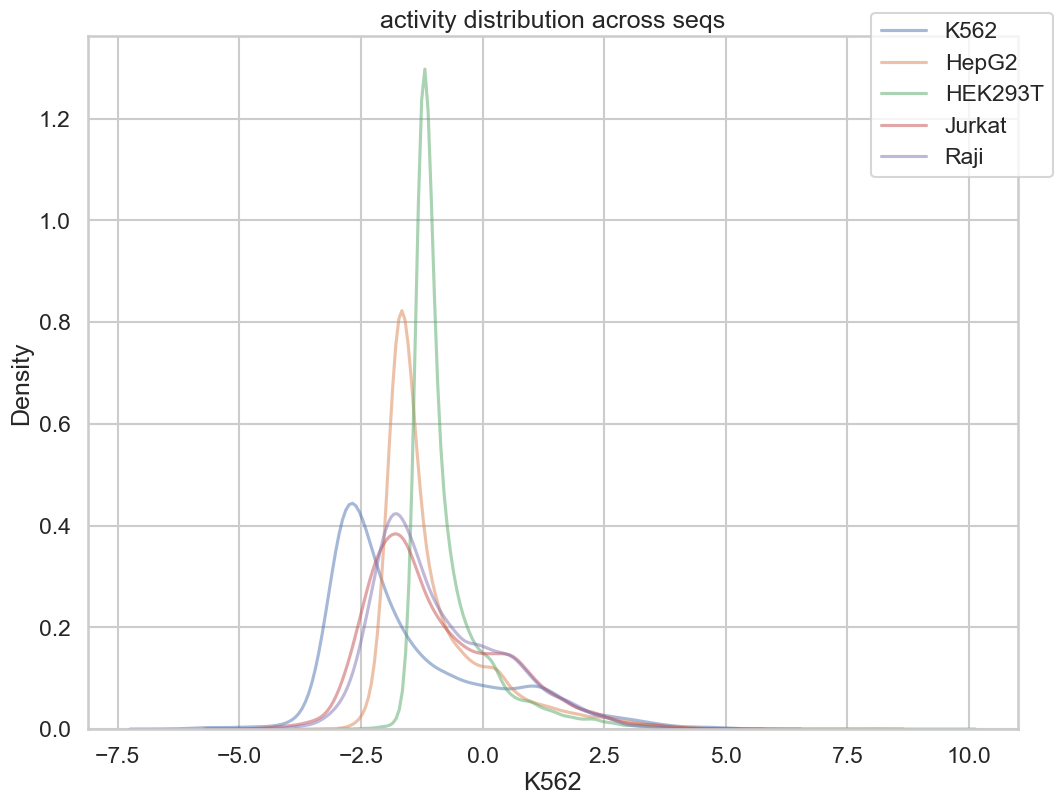

In [44]:
plt.figure(figsize=(12,9))
for col in df.columns.drop(['seq', 'id']):
    sns.kdeplot(df[col], label=col, alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.title("activity distribution across seqs")
plt.show()

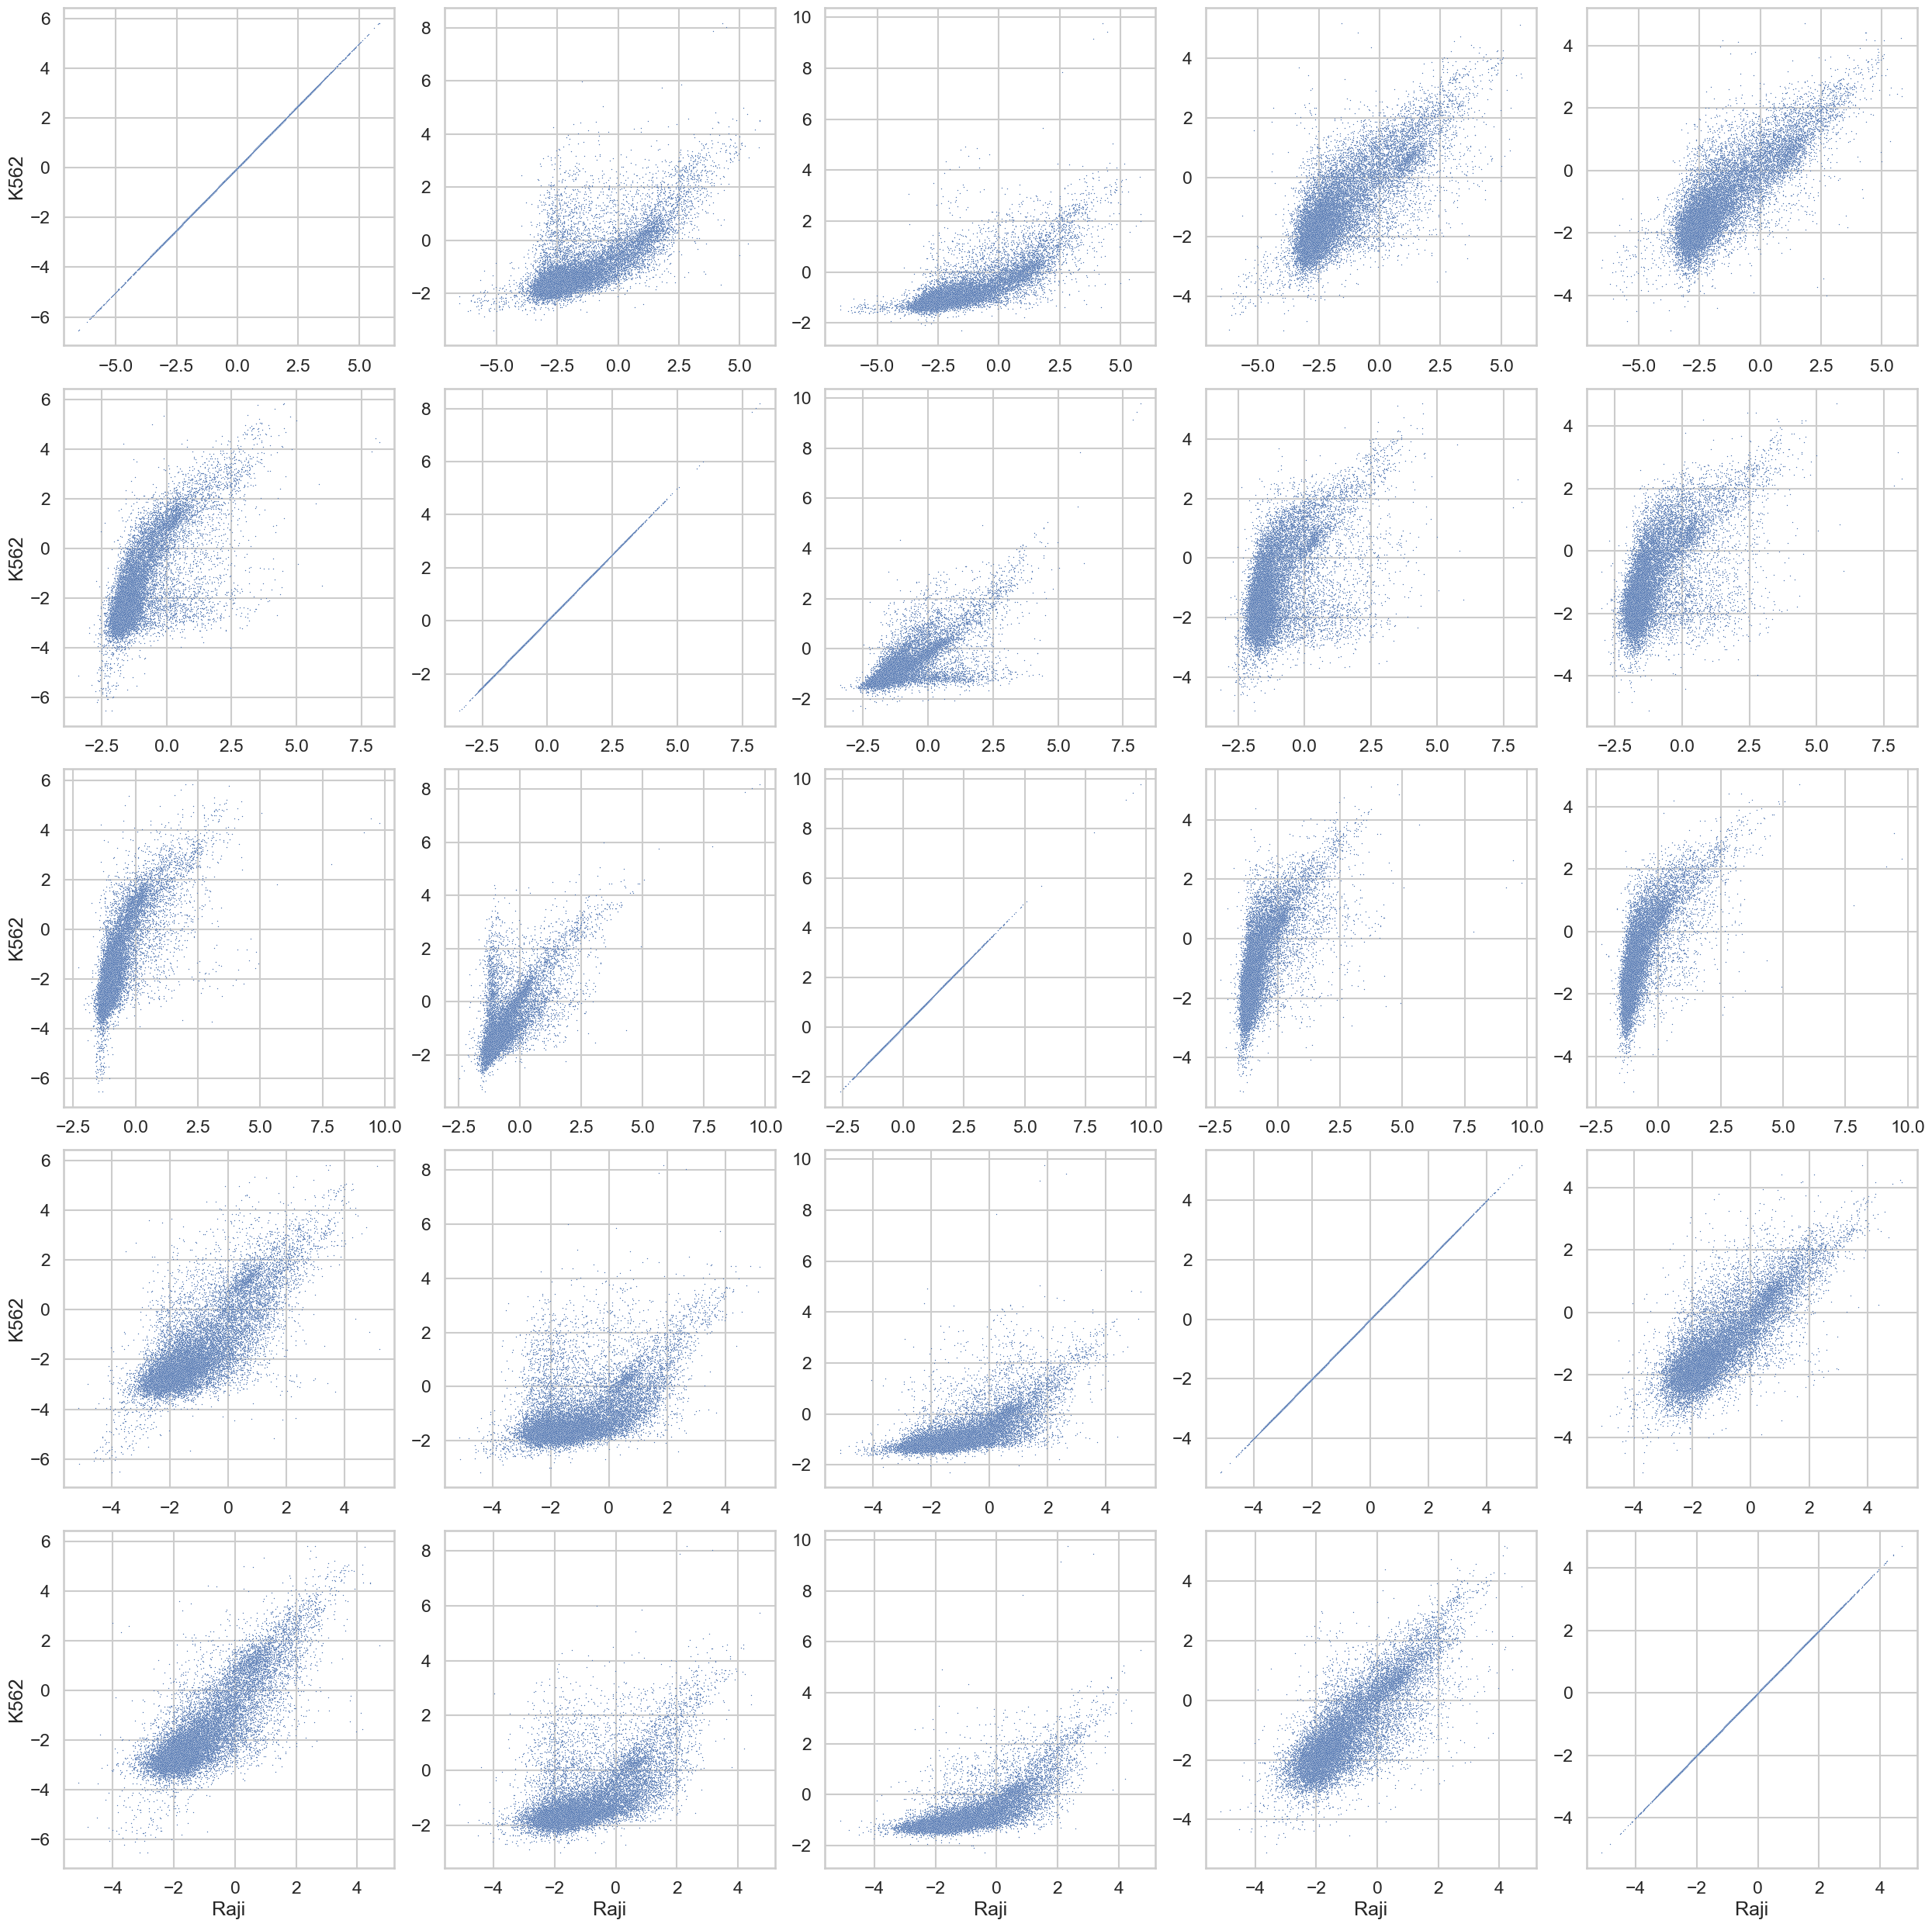

In [50]:
fig, axes = plt.subplots(5, 5, figsize=(5*5, 5*5))
for i, c1 in enumerate(cell_types):
    for j, c2 in enumerate(cell_types):
        ax = axes[i,j]
        sns.scatterplot(x=c1, y=c2, data=df, s=1, ax=ax)
        # 只保留左边第一列的 y 标签
        if j > 0:
            ax.set_ylabel("")
        # 只保留底下一行的 x 标签
        if i < len(cell_types) - 1:
            ax.set_xlabel("")
plt.tight_layout()
plt.show()